In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/Users/i871402/Desktop/cats_and_dogs_small/train'
validation_data_dir = '/Users/i871402/Desktop/cats_and_dogs_small/validation'
test_dir='/Users/i871402/Desktop/cats_and_dogs_small/train'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [17]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [19]:
img = load_img('/Users/i871402/Desktop/cats_and_dogs_small/train/dogs/dog.4.jpg') 
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/Users/i871402/Desktop/cats_and_dogs_small/preview', save_prefix='dog', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely


In [16]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [22]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('image_classifier.h5')

Epoch 1/50
125/125 [==============================] - 43s 345ms/step - loss: 0.6314 - acc: 0.6635 - val_loss: 0.6275 - val_acc: 0.6667
Epoch 2/50
125/125 [==============================] - 44s 350ms/step - loss: 0.6237 - acc: 0.6745 - val_loss: 0.6274 - val_acc: 0.6667
Epoch 3/50
125/125 [==============================] - 43s 346ms/step - loss: 0.6410 - acc: 0.6640 - val_loss: 0.6251 - val_acc: 0.6667
Epoch 4/50
125/125 [==============================] - 44s 350ms/step - loss: 0.6276 - acc: 0.6635 - val_loss: 0.6286 - val_acc: 0.6667
Epoch 5/50
125/125 [==============================] - 43s 347ms/step - loss: 0.6269 - acc: 0.6675 - val_loss: 0.6357 - val_acc: 0.6667
Epoch 6/50
125/125 [==============================] - 46s 365ms/step - loss: 0.6303 - acc: 0.6700 - val_loss: 0.6380 - val_acc: 0.6667
Epoch 7/50
125/125 [==============================] - 47s 373ms/step - loss: 0.6481 - acc: 0.6520 - val_loss: 0.6351 - val_acc: 0.6667
Epoch 8/50
125/125 [==============================] - 4

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [6]:
#Using a pretrained network
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 11s 0us/step


In [7]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [8]:
#Unfreezing
conv_base.trainable = True
set_trainable = False
#Training only 3 layers
for layer in conv_base.layers:
    if layer.name == 'block5_conv2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 338s 3s/step - loss: 5.4314 - acc: 0.6594 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 2/100
100/100 [==============================] - 340s 3s/step - loss: 5.3190 - acc: 0.6700 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 3/100
100/100 [==============================] - 344s 3s/step - loss: 5.5204 - acc: 0.6575 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 4/100
100/100 [==============================] - 341s 3s/step - loss: 5.2384 - acc: 0.6750 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 5/100
100/100 [==============================] - 343s 3s/step - loss: 5.4701 - acc: 0.6606 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 6/100
100/100 [==============================] - 336s 3s/step - loss: 5.4499 - acc: 0.6619 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 7/100
100/100 [==============================] - 338s 3s/step - loss: 5.0170 - acc: 0.6887 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 8/100
100/100 [==============================] - 335s 3s

Epoch 62/100
100/100 [==============================] - 338s 3s/step - loss: 5.4197 - acc: 0.6637 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 63/100
100/100 [==============================] - 339s 3s/step - loss: 5.5406 - acc: 0.6562 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 64/100
100/100 [==============================] - 337s 3s/step - loss: 5.1879 - acc: 0.6781 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 65/100
100/100 [==============================] - 337s 3s/step - loss: 5.3091 - acc: 0.6706 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 66/100
100/100 [==============================] - 338s 3s/step - loss: 5.5305 - acc: 0.6569 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 67/100
100/100 [==============================] - 336s 3s/step - loss: 5.2083 - acc: 0.6769 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 68/100
100/100 [==============================] - 17164s 172s/step - loss: 5.5406 - acc: 0.6562 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 69/100
100/100 [=============================

In [18]:
model.save('cimage_classifier_pretrained.h5')

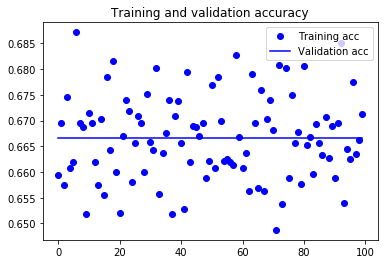

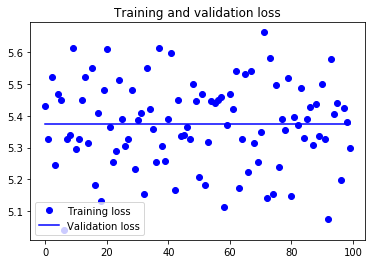

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 3000 images belonging to 2 classes.
test acc: 0.6799999970197678
